Churn is expresssed as a degree of customer inactivity or disengagement, observed over a period. This is seen within our dataset in various forms such as the recency in account actions or change in the account balance

We aim to accomplish the following for this study:

* identify and visualize which factors contribute to customer churn.

* Determine if a customer is going to churn or not

* choose a model that will attach a probaliity to churn to make it easier for customer service make various informed decisions from the model.

In [ ]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## data info
## checking for null values in dataset and also if features have the correct dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


no null values  and dtypes matches the features

In [ ]:
## exploring features in dataset
list(data.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
## drop some categorical variables 
data.drop(['CustomerId', 'RowNumber', 'Surname'], axis='columns', inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

plotting a pie chart to determine proportion of churned customers 

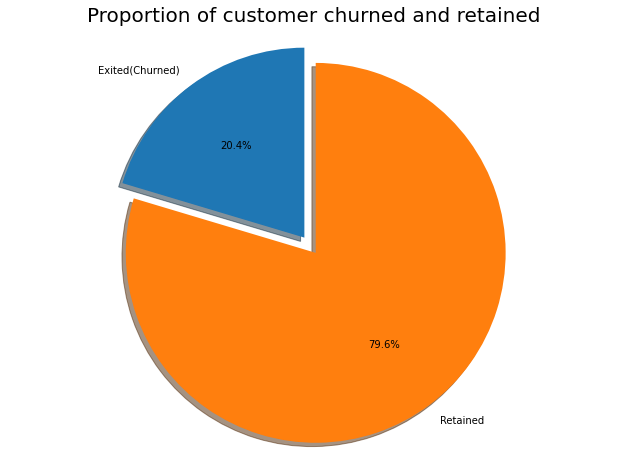

In [ ]:
labels = 'Exited(Churned)', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(11, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

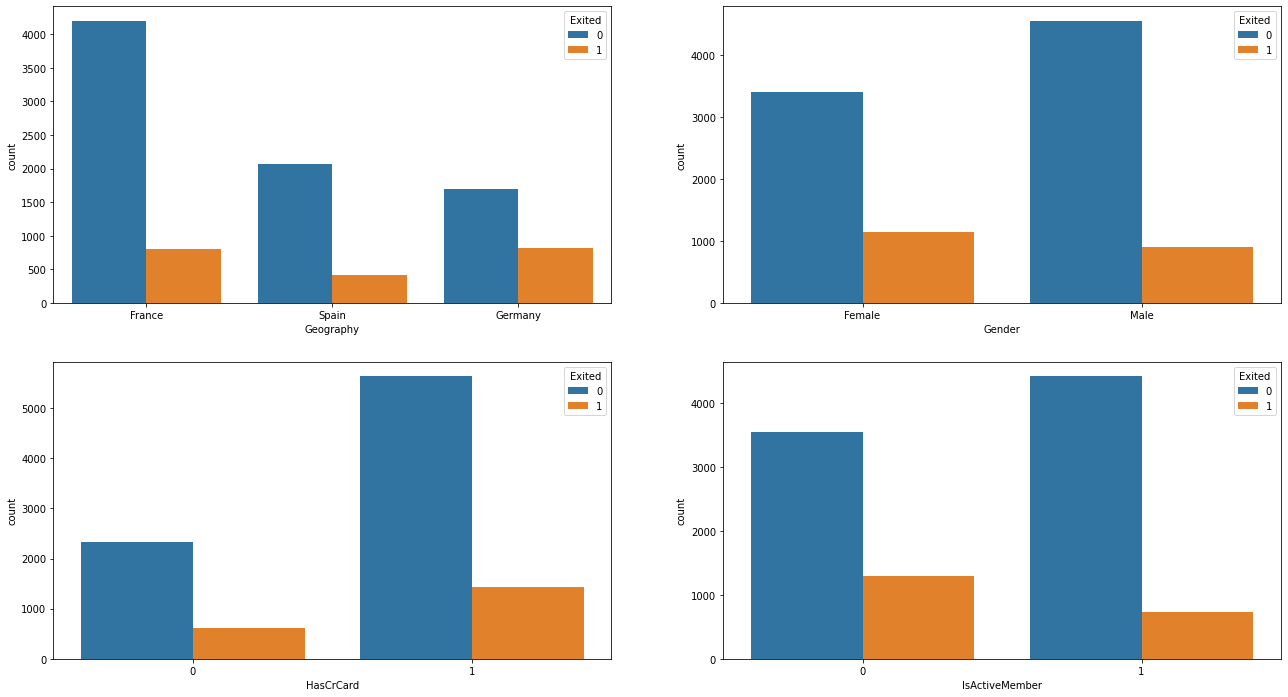

In [ ]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(22, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

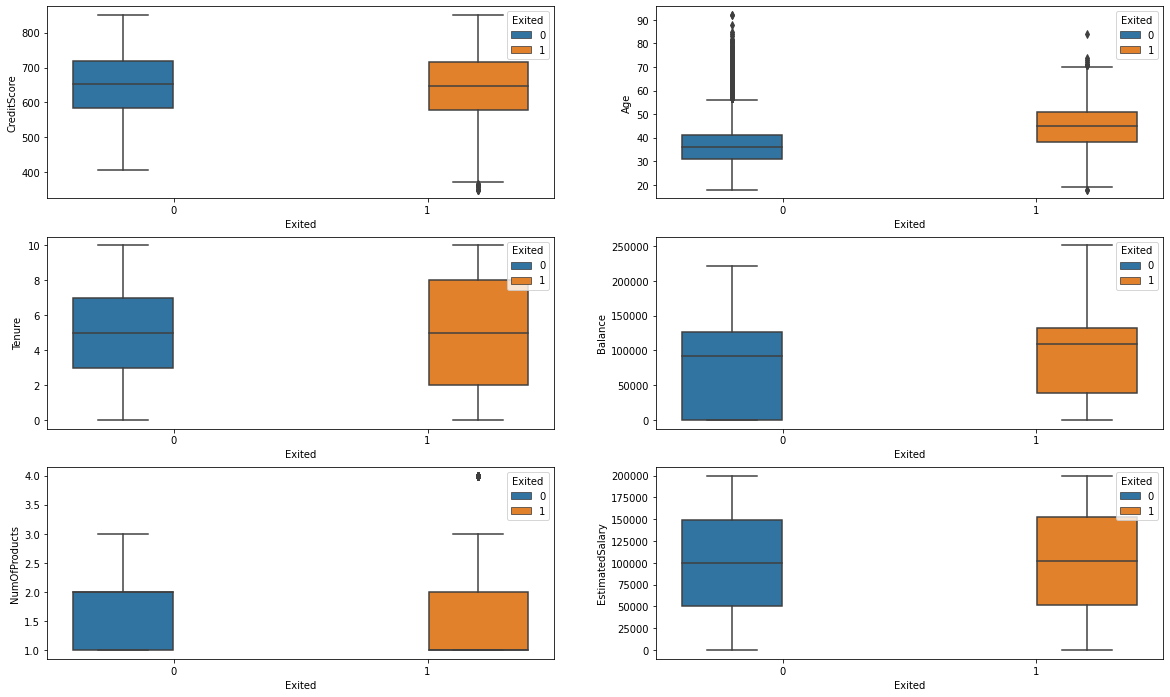

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


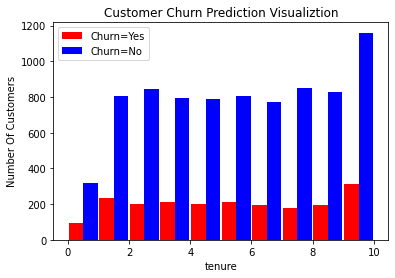

In [ ]:
tenure_churn_no = data[data.Exited==0].Tenure
tenure_churn_yes = data[data.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

FEATURE ENGINEERING

##creating a new column BalanceSalaryRatio

(-1.0, 5.0)

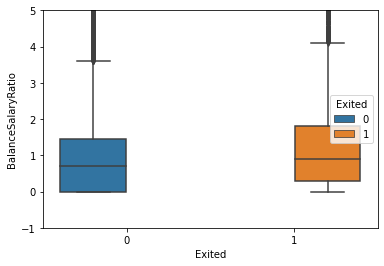

In [ ]:
data['BalanceSalaryRatio'] = data.Balance/data.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = data)
plt.ylim(-1, 5)

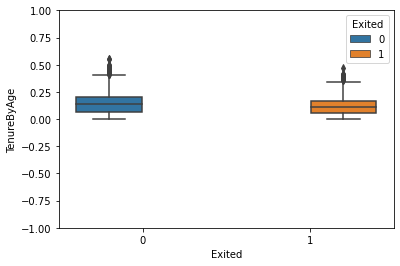

In [ ]:
data['TenureByAge'] = data.Tenure/(data.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = data)
plt.ylim(-1, 1)
plt.show()

In [ ]:
##printing the categorical variables and encoding

def print_unique_col_values(data):
  for column in data:
    if data[column].dtypes =='object':
      print(f'{column}: {data[column].unique()}')
print_unique_col_values(data)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
##label encoding

data['Gender'].replace({'Male': 1,'Female': 0}, inplace=True)

In [ ]:
## One hot encoding

data1 = pd.get_dummies(data = data, columns=['Geography'])
data1.head(15)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0.759604,0.181818,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0.000000,0.140000,1,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,0,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1.895518,0.090909,1,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1.876647,0.074074,1,0,0


In [ ]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[scale_var] = scaler.fit_transform(data1[scale_var])

data1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [ ]:
data1.shape

(10000, 15)

In [ ]:
##
X = data1.drop('Exited', axis='columns') ## independent features
y = data1['Exited']### dependent features


##splitting to train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)## 20% of data be used as test data

In [ ]:
X_train.shape

(7000, 14)

In [ ]:
y_train.shape

(7000,)

In [ ]:
len(X_train.columns)

14

model bulding and prediction

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
keras.layers.Dense(12, input_dim = 14, kernel_initializer='normal' , activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
           loss ='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)
#evaluate accuracy
val_loss, val_acc = model.evaluate(X_train, y_train)
print('validation accuracy:', val_acc)
print('validation loss:' , val_loss)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.5787 - accuracy: 0.7773
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7979
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7976
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8021
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8026
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8047
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8054
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8093
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8103
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4385 - accura

In [ ]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 960us/step - loss: 0.3472 - accuracy: 0.8550


[0.3471868932247162, 0.8550000190734863]

In [ ]:
y_predict = model.predict(X_test)
print(y_predict)

[[0.41950604]
 [0.34804824]
 [0.19422314]
 ...
 [0.09617209]
 [0.20033208]
 [0.5277497 ]]


### **Converting our predicitions to 0,1 to check accuracy**

In [ ]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
##checking accuracy
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2379
           1       0.71      0.51      0.59       621

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.84      0.85      0.85      3000



Accuracy: 0.855
Overall Precision: 0.7085201793721974
Overall Recall: 0.5088566827697263


Text(69.0, 0.5, 'Truth')

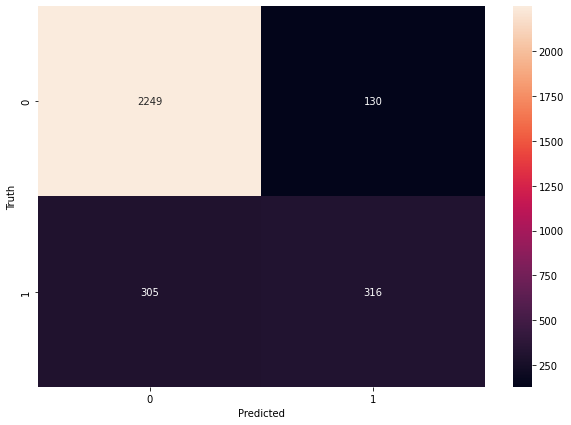

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
plt.xlabel('Predicted')
plt.ylabel('Truth')

The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

In [ ]:
y_scores = np.array(y_predict)
y_scores

array([[0.41950604],
       [0.34804824],
       [0.19422314],
       ...,
       [0.09617209],
       [0.20033208],
       [0.5277497 ]], dtype=float32)

In [ ]:
y_test1 = np.array(y_test)
y_test1

array([0, 1, 0, ..., 0, 0, 1])

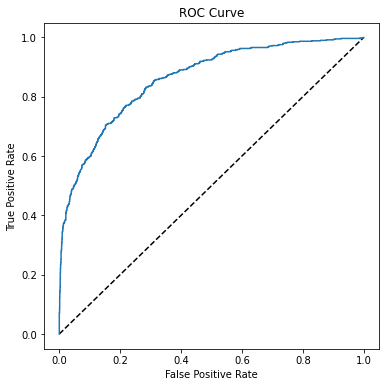

In [ ]:
from sklearn.metrics import roc_curve


# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_predict)
print('AUC: ' + str(auc))

AUC: 0.8608699713475194


Value of AUC shows the model performs better than a random guess. so we try to a new model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(random_state=40,n_jobs =1, max_depth = None,
                            n_estimators=250, oob_score=False,)

model = clf.fit(X_train,y_train)
print(model)

RandomForestClassifier(n_estimators=250, n_jobs=1, random_state=40)


Confusion Matrix:
 [[2301   78]
 [ 305  316]] 

Accuracy: 0.8723333333333333
Overall Precision: 0.8020304568527918
Overall Recall: 0.5088566827697263

AUC: 0.7380348987619123


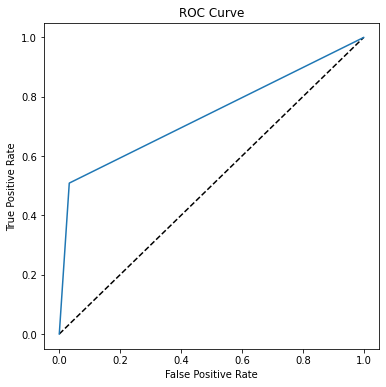

In [ ]:
##checking performance of new model
predictions = model.predict(X_test)
y_scores = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores)
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
rfc = RandomForestClassifier()
parameters = { 
    'n_estimators':[5,10,50,100,250],
     'max_depth':[2,4,8,16,32,None]
}
from sklearn.model_selection import GridSearchCV
cv =GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
##print the best parameters 

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 250}


0.814 + or -0.006 for the {'max_depth': 2, 'n_estimators': 5}
0.809 + or -0.008 for the {'max_depth': 2, 'n_estimators': 10}
0.809 + or -0.005 for the {'max_depth': 2, 'n_estimators': 50}
0.804 + or -0.002 for the {'max_depth': 2, 'n_estimators': 100}
0.803 + or -0.003 for the {'max_depth': 2, 'n_estimators': 250}
0.824 + or -0.01 for the {'max_depth': 4, 'n_estimators': 5}
0.829 + or -0.006 for the {'max_depth': 4, 'n_estimators': 10}
0.827 + or -0.004 for the {'max_depth': 4, 'n_estimators': 50}
0.83 + or -0.002 for the {'max_depth': 4, 'n_estimators': 100}
0.83 + or -0.005 for the {'max_depth': 4, 'n_estimators': 250}
0.851 + or -0.004 for the {'max_depth': 8, 'n_estimators': 5}
0.852 + or -0.005 for the {'max_depth': 8, 'n_estimators': 10}
0.856 + or -0.006 for the {'max_depth': 8, 'n_estimators': 50}
0.858 + or -0.004 for the {'max_depth': 8, 'n_estimators': 100}
0.858 + or -0.006 for the {'max_depth': 8, 'n_estimator

In [ ]:

print("Accuracy score is: ", accuracy_score(y_test,predictions)*100,"%")

Accuracy score is:  87.23333333333333 %


we save the model for later use

In [ ]:
import joblib

# Save the model as a pickle file
filename = './bank_customerChurn.pkl'
joblib.dump(model, filename)

['./bank_customerChurn.pkl']

Using AUTO ML

#H20 Auto ML

In [1]:
!pip install requests
!pip install tabulate
!pip install 'colorama>=0.3.8'
!pip install future

In [2]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 16 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=fd0b25a0a8f0ca3577d7e2848d35c88af5019dde57cf77d11dfd946f2f0110bd
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


#importing the h2o python module and H2O AUTOML class

In [4]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp25l_aqqk
  JVM stdout: /tmp/tmp25l_aqqk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp25l_aqqk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_g8rho9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
#loading the data

df = h2o.import_file('Churn_Modelling.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


spliting the data

In [8]:
df_train,df_test= df.split_frame(ratios=[.8])

In [10]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
11,1.57678e+07,Bearce,528,France,Male,31,6,102017,2,0,0,80181.1,0


In [11]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

defining model

In [12]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

fitting model

In [13]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
06:00:00.394: Project: AutoML_1_20220418_60000
06:00:00.418: Setting stopping tolerance adaptively based on the training frame: 0.011151799920304555
06:00:00.419: Build control seed: 10
06:00:00.429: training frame: Frame key: AutoML_1_20220418_60000_training_py_3_sid_b4d3    cols: 14    rows: 8041  chunks: 8    size: 426704  checksum: 6632946738985574298
06:00:00.430: validation frame: NULL
06:00:00.431: leaderboard frame: NULL
06:00:00.432: blending frame: NULL
06:00:00.433: response column: Exited
06:00:00.435: fold column: null
06:00:00.435: weights column: null
06:00:00.508: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.210346,0.004151,0.213282,0.207411
1,mean_residual_deviance,0.102464,0.000858,0.103070,0.101857
2,mse,0.102464,0.000858,0.103070,0.101857
3,null_deviance,652.551700,19.907360,638.475040,666.628300
4,r2,0.368410,0.014228,0.358349,0.378471
5,residual_deviance,411.927200,3.289041,409.601470,414.252870
6,rmse,0.320098,0.001340,0.321046,0.319151
7,rmsle,0.224974,0.002283,0.226588,0.223360


##seeing leaderboard

In [15]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20220418_60000,0.320106,0.102468,0.208841,0.225069,0.102468
StackedEnsemble_BestOfFamily_1_AutoML_1_20220418_60000,0.320129,0.102482,0.209316,0.224912,0.102482
GBM_2_AutoML_1_20220418_60000,0.320219,0.10254,0.211733,0.224941,0.10254
GBM_3_AutoML_1_20220418_60000,0.322698,0.104134,0.212387,0.227447,0.104134
GBM_1_AutoML_1_20220418_60000,0.323059,0.104367,0.216501,0.22751,0.104367
GBM_4_AutoML_1_20220418_60000,0.324724,0.105446,0.215387,0.229443,0.105446
DRF_1_AutoML_1_20220418_60000,0.328814,0.108119,0.217095,0.233476,0.108119
XGBoost_3_AutoML_1_20220418_60000,0.32957,0.108617,0.2184,0.233363,0.108617
XRT_1_AutoML_1_20220418_60000,0.340722,0.116091,0.250563,0.243967,0.116091
XGBoost_2_AutoML_1_20220418_60000,0.35688,0.127364,0.242789,0.258889,0.127364


getting all the model ids

In [16]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20220418_60000',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220418_60000',
 'GBM_2_AutoML_1_20220418_60000',
 'GBM_3_AutoML_1_20220418_60000',
 'GBM_1_AutoML_1_20220418_60000',
 'GBM_4_AutoML_1_20220418_60000',
 'DRF_1_AutoML_1_20220418_60000',
 'XGBoost_3_AutoML_1_20220418_60000',
 'XRT_1_AutoML_1_20220418_60000',
 'XGBoost_2_AutoML_1_20220418_60000',
 'XGBoost_1_AutoML_1_20220418_60000',
 'GLM_1_AutoML_1_20220418_60000']

In [17]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.10450720543171729
RMSE: 0.32327574210218324
MAE: 0.20820211506371739
RMSLE: 0.2266586371889735
R^2: 0.3544511206764148
Mean Residual Deviance: 0.10450720543171729
Null degrees of freedom: 1958
Residual degrees of freedom: 1951
Null deviance: 317.1412453378905
Residual deviance: 204.72961544073416
AIC: 1153.001125783288


Getting the model details for best performing model

In [18]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220418_60000

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07713669723577267
RMSE: 0.27773494061023846
MAE: 0.17680359326247105
RMSLE: 0.1930568810799981
R^2: 0.5246795051591974
Mean Residual Deviance: 0.07713669723577267
Null degrees of freedom: 8040
Residual degrees of freedom: 8033
Null deviance: 1304.9220246237967
Residual deviance: 620.2561824728481
AIC: 2234.911130644607

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10246815482991802
RMSE: 0.3201064742080641
MAE: 0.20884105250543109
RMSLE: 0.22506868774877398
R^2: 0.36858569520664886
Mean Residual Deviance: 0.10246815482991802
Null degrees of freedom: 8040
Residual degrees of freedom: 8034
Null deviance: 1305.1033751069472
Residual deviance: 823.9464329873707
AIC: 4516.337453155436

Cross-Validation Metri

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.210346,0.004151,0.213282,0.207411
1,mean_residual_deviance,0.102464,0.000858,0.103070,0.101857
2,mse,0.102464,0.000858,0.103070,0.101857
3,null_deviance,652.551700,19.907360,638.475040,666.628300
4,r2,0.368410,0.014228,0.358349,0.378471
5,residual_deviance,411.927200,3.289041,409.601470,414.252870
6,rmse,0.320098,0.001340,0.321046,0.319151
7,rmsle,0.224974,0.002283,0.226588,0.223360


In [19]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220418_60000',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220418_60000',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_1_AutoML_1_20220418_60000',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_4_AutoML_1_20220418_60000',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'DRF_1_AutoML_1_20220

In [20]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220418_60000

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07713669723577267
RMSE: 0.27773494061023846
MAE: 0.17680359326247105
RMSLE: 0.1930568810799981
R^2: 0.5246795051591974
Mean Residual Deviance: 0.07713669723577267
Null degrees of freedom: 8040
Residual degrees of freedom: 8033
Null deviance: 1304.9220246237967
Residual deviance: 620.2561824728481
AIC: 2234.911130644607

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10246815482991802
RMSE: 0.3201064742080641
MAE: 0.20884105250543109
RMSLE: 0.22506868774877398
R^2: 0.36858569520664886
Mean Residual Deviance: 0.10246815482991802
Null degrees of freedom: 8040
Residual degrees of freedom: 8034
Null deviance: 1305.1033751069472
Residual deviance: 823.9464329873707
AIC: 4516.337453155436

Cross-Validation Metri

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.210346,0.004151,0.213282,0.207411
1,mean_residual_deviance,0.102464,0.000858,0.103070,0.101857
2,mse,0.102464,0.000858,0.103070,0.101857
3,null_deviance,652.551700,19.907360,638.475040,666.628300
4,r2,0.368410,0.014228,0.358349,0.378471
5,residual_deviance,411.927200,3.289041,409.601470,414.252870
6,rmse,0.320098,0.001340,0.321046,0.319151
7,rmsle,0.224974,0.002283,0.226588,0.223360


In [21]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [22]:
y_pred

predict
0.0478991
0.0223838
0.00749976
0.0137711
0.0326522
0.043436
0.705156
0.165448
0.270034
0.0741373
